# Import Necessary Libraries:

In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Loading the Dataset:

In [47]:
data=pd.read_csv('IRIS.csv')

# Displaying the Dataset:

In [49]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Information of the Raw Data:

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Describing the Dataset:

In [53]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Shape of the Dataset:

In [54]:
data.shape

(150, 5)

# Size of the Dataset:

In [116]:
data.size

882

# List of All Column Names:

In [120]:
data.columns

Index(['index', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Checking for Missing Values:

In [56]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Displaying Unique Species :

In [58]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# To Drop Duplicates :

In [60]:
duplicates=data.duplicated()
data[duplicates]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


# Removing Duplicate Rows and Resetting Index :

In [62]:
data=data.drop_duplicates()
data=data.reset_index()

# Displaying Unique Feature Values:

In [64]:
data['sepal_length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [65]:
data['sepal_width'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [66]:
data['petal_length'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [67]:
data['petal_width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

# Class Distribution of Iris Species:

In [69]:
data["species"].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

# Input Features for Iris Classification:

In [71]:
data_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Line Plot of Feature Means Across Iris Species:

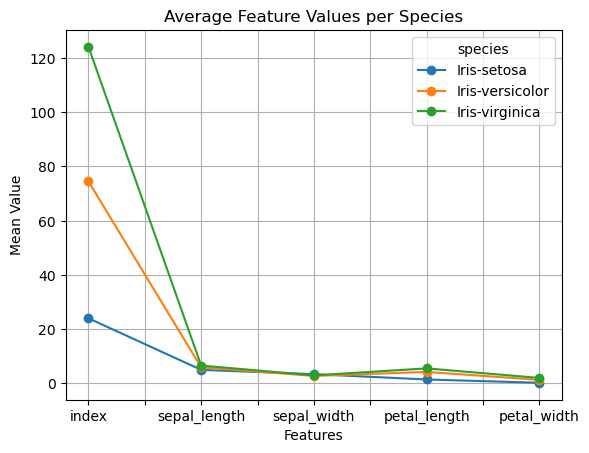

In [125]:
mean_values = data.groupby('species').mean()
mean_values.T.plot(kind='line', marker='o')
plt.title('Average Feature Values per Species')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()

# Boxplot Visualization of Features by Species:

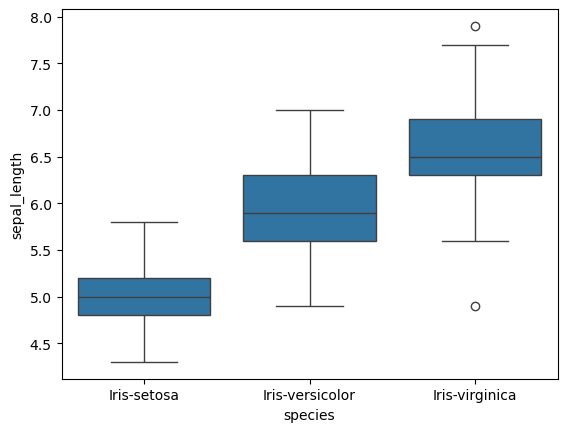

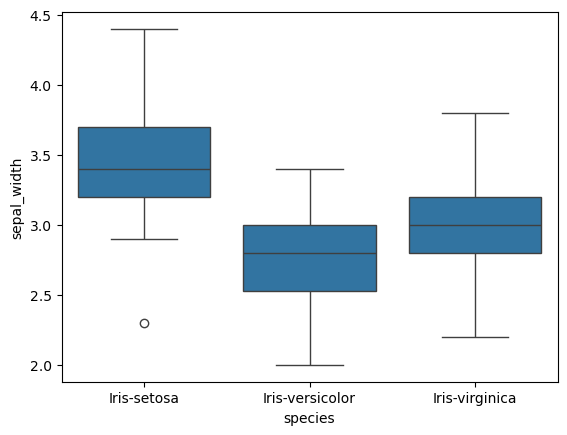

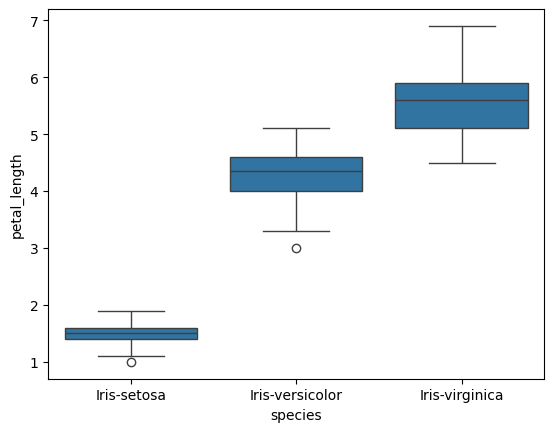

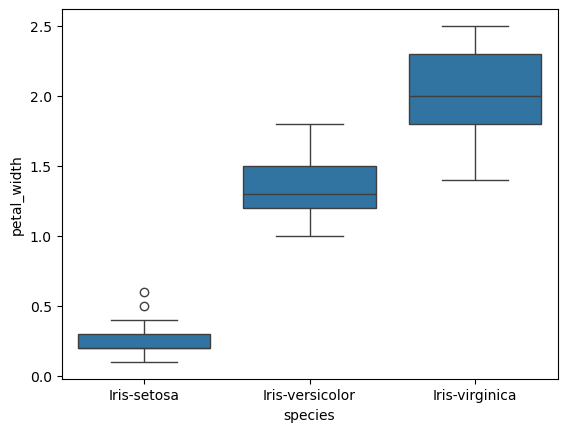

In [73]:
for col in data_cols:
    sns.boxplot(x="species",y=col,data=data) 
    plt.show()

# Strip Plot of Feature Variation by Species:

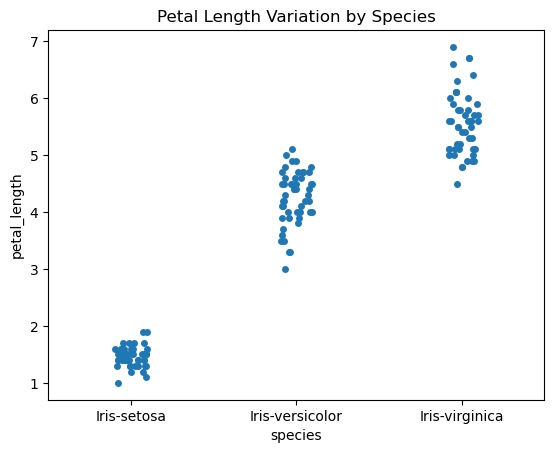

In [136]:
sns.stripplot(x='species', y='petal_length', data=data, jitter=True)
plt.title('Petal Length Variation by Species')
plt.show()

# Feature-wise Mean Comparison Among Iris Classes:

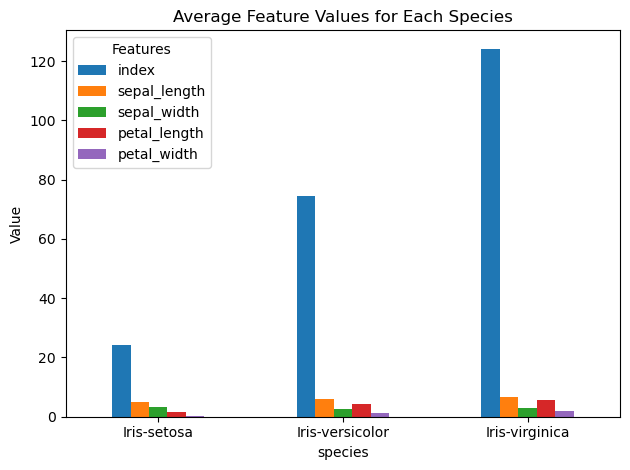

In [153]:
mean_values.plot(kind='bar')
plt.title('Average Feature Values for Each Species')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.tight_layout()
plt.show()

# Pairplot for Visualizing Feature Relationships by Species:

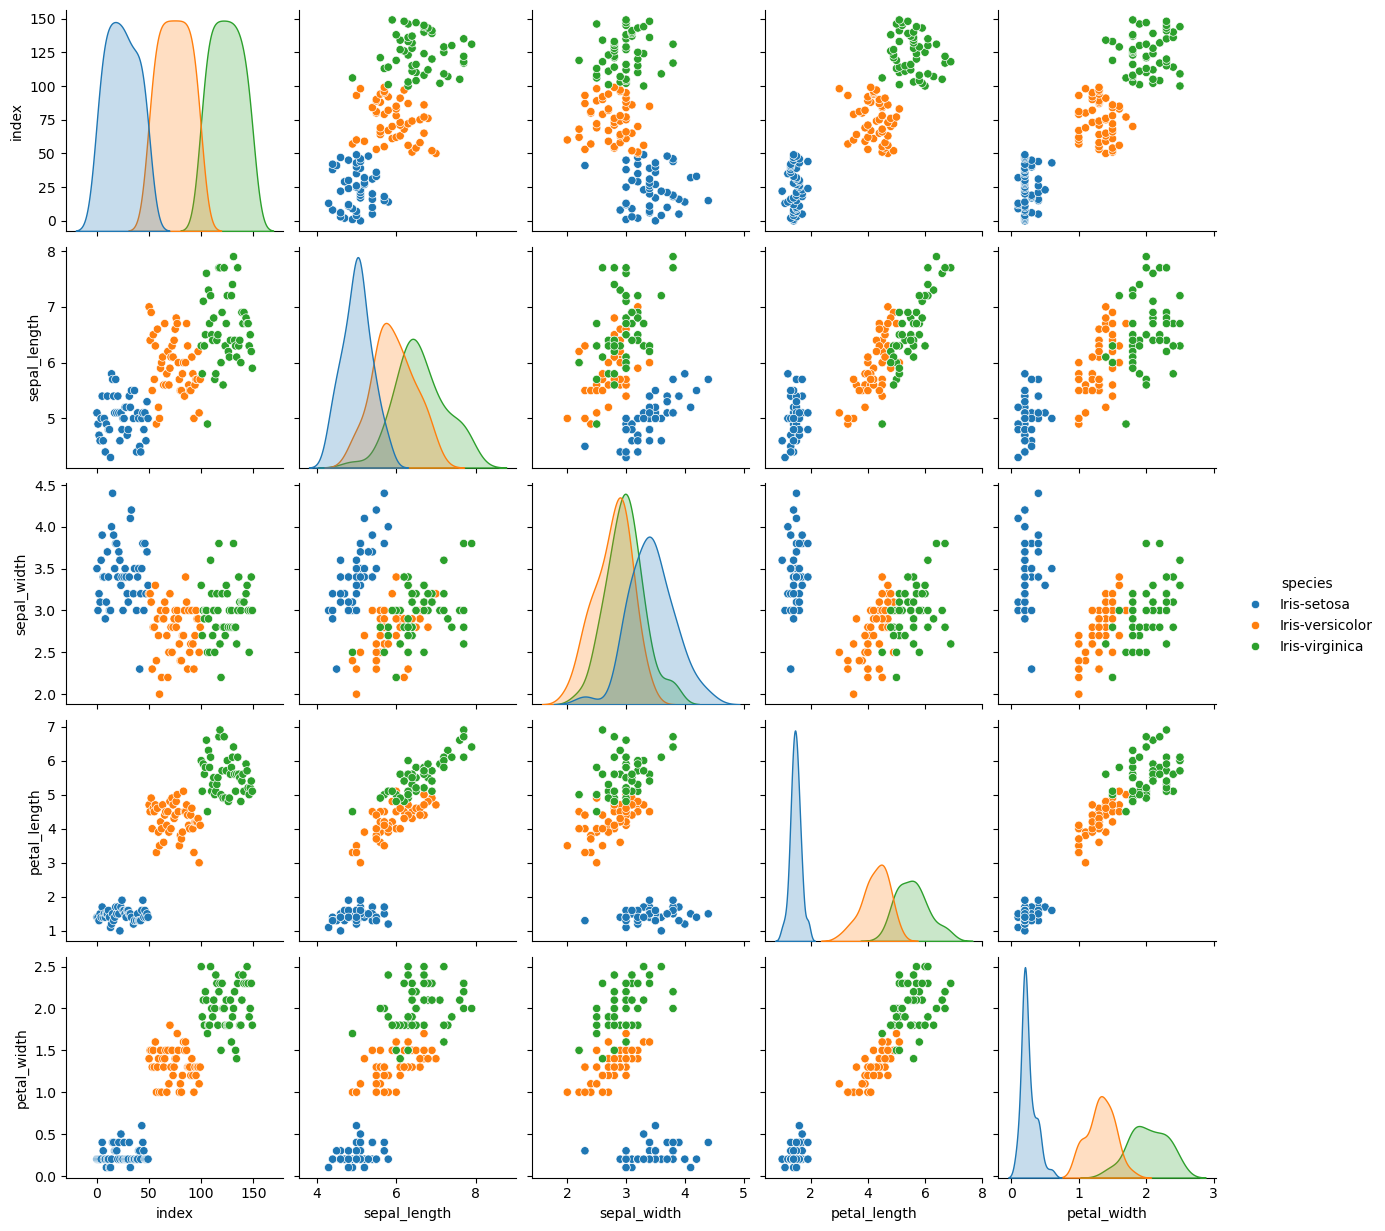

In [75]:
sns.pairplot(data, hue='species')

# Feature-wise Value Distribution:

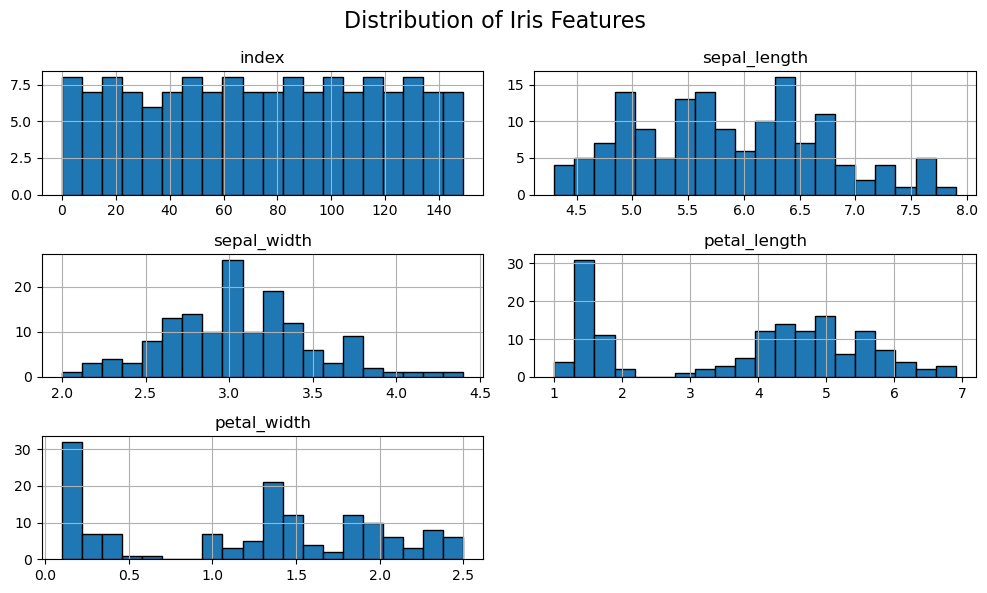

In [128]:
data.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Distribution of Iris Features", fontsize=16)
plt.tight_layout()
plt.show()

# Species-wise Sample Count:

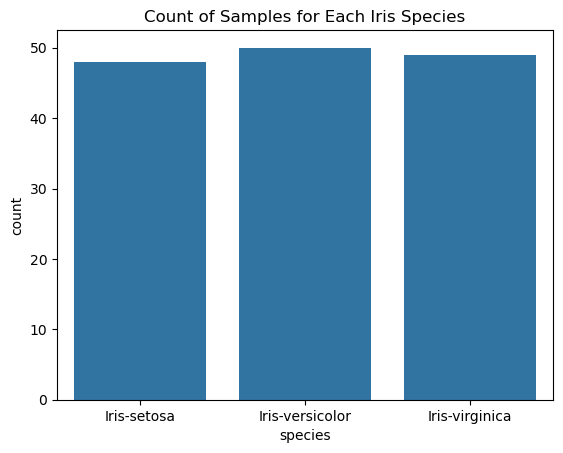

In [133]:
sns.countplot(x='species', data=data)
plt.title("Count of Samples for Each Iris Species")
plt.show()

# Defining Input (X) and Output (y) for Model Training:

In [77]:
X = data.drop('species', axis=1)
y = data['species']

# Train-Test Split for Model Evaluation:

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Training and Testing Data:

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Random Forest for Iris Classification:

In [83]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Evaluating Model Performance on Test Data:

In [85]:
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 1.0

📋 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Confusion Matrix Visualization:

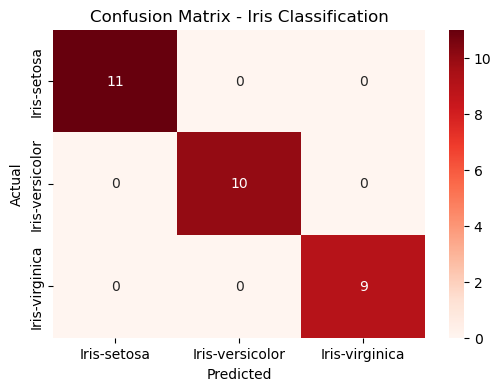

In [87]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Classification")
plt.show()

# Confusion Matrix - Numerical Representation:

In [89]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
